# Problem Statement:

The objective is to automate the loan eligibility process based on customer details. We have a dataset that includes information such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and more.

In [1]:
import sys
!{sys.executable} -m pip install pandas matplotlib
!{sys.executable} -m pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


## Step1:
**load the loan.csv file from data folder as a pandas dataframe and visualize the first 5 rows of the dataframe.**

In [ ]:
import pandas as pd

def load_data(address):
    df = pd.read_csv(address)
    return df

df = pd.read_csv("data/loan.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Step2: 
**Explore the data**

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The following function will create a histogram for each of the numerical features.

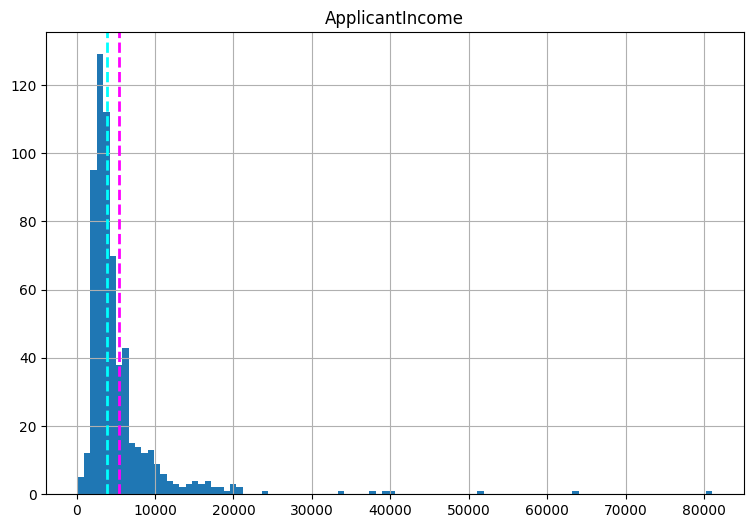

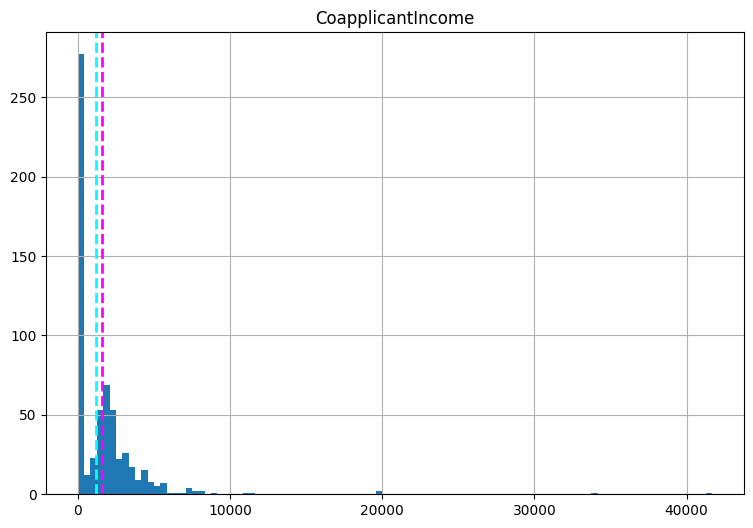

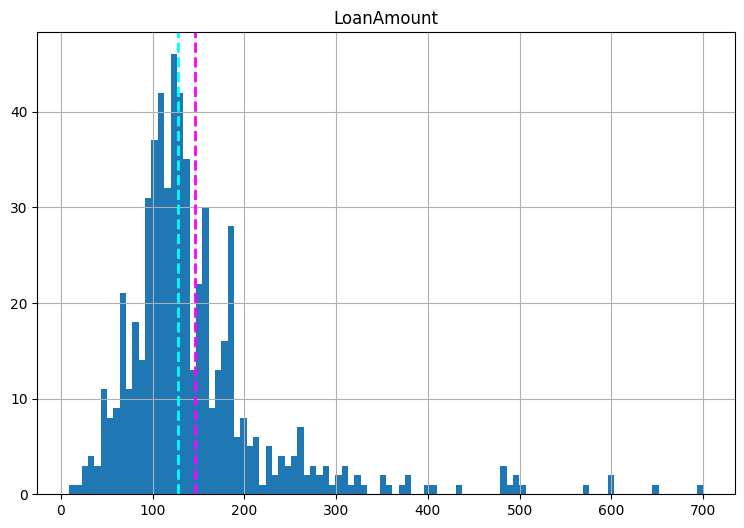

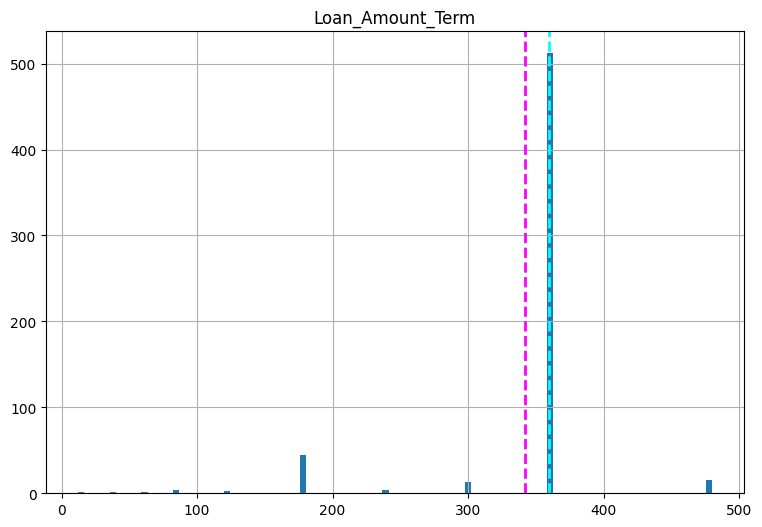

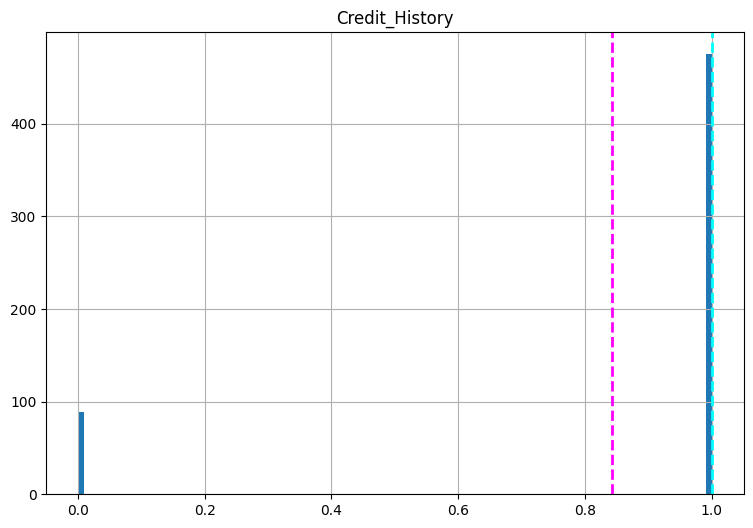

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_histogram(df, col):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col].dropna()
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numeric_features:
    plot_histogram(df, col)
plt.show()

The following function will compare the distribution of samples per label for each feature by plotting a boxplot.

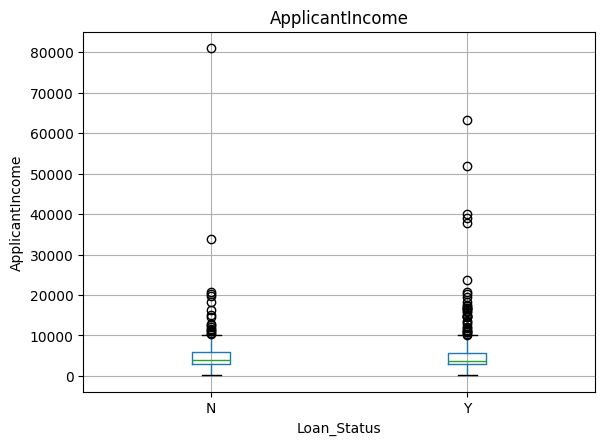

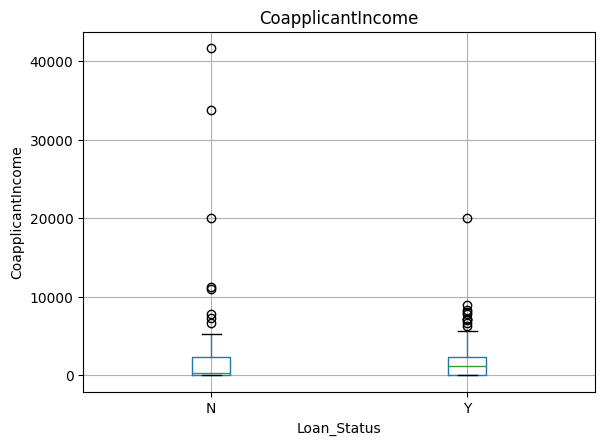

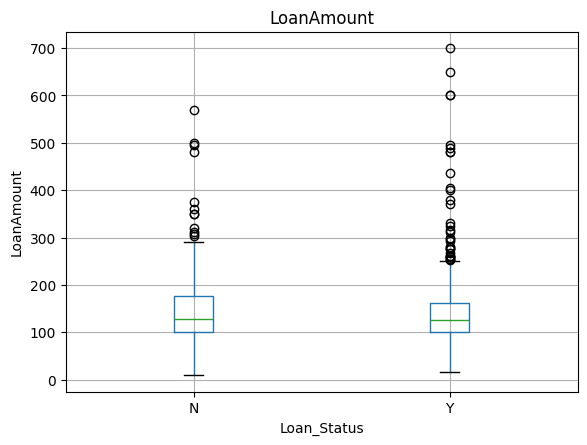

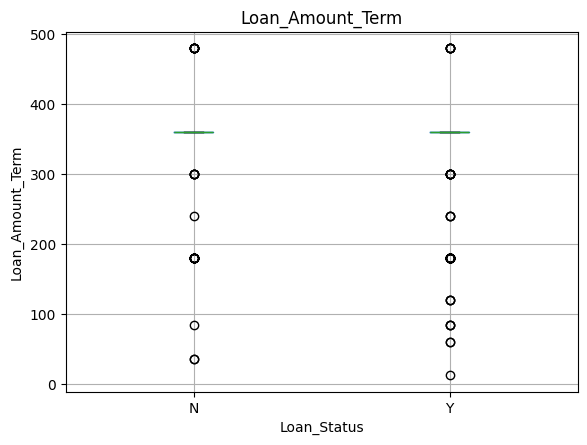

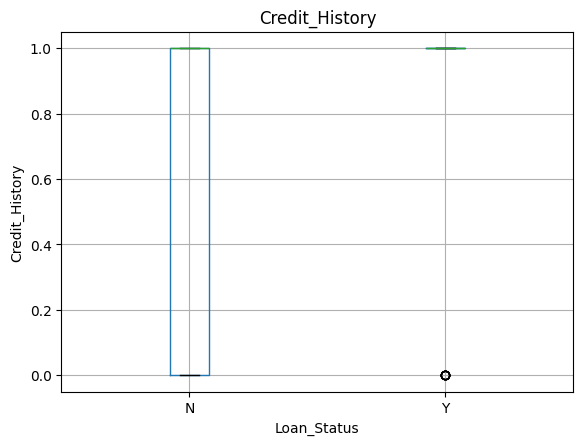

In [5]:
def plot_boxplot(df, col):
    df.boxplot(column=col, by='Loan_Status')
    plt.title(col)
    plt.suptitle("")
    plt.ylabel(col)

for col in numeric_features:
    plot_boxplot(df, col)


The bar charts show that certain categorical features are associated with loan approval. Applicants with a credit history and those who are married tend to have higher approval rates. Graduates also appear to receive more approvals compared to non-graduates. Most approved loans are from applicants in urban and semi-urban property areas, while rural applicants have slightly fewer approvals. The distribution also shows that the dataset is imbalanced, with more approved loans (Y) than denied loans (N).

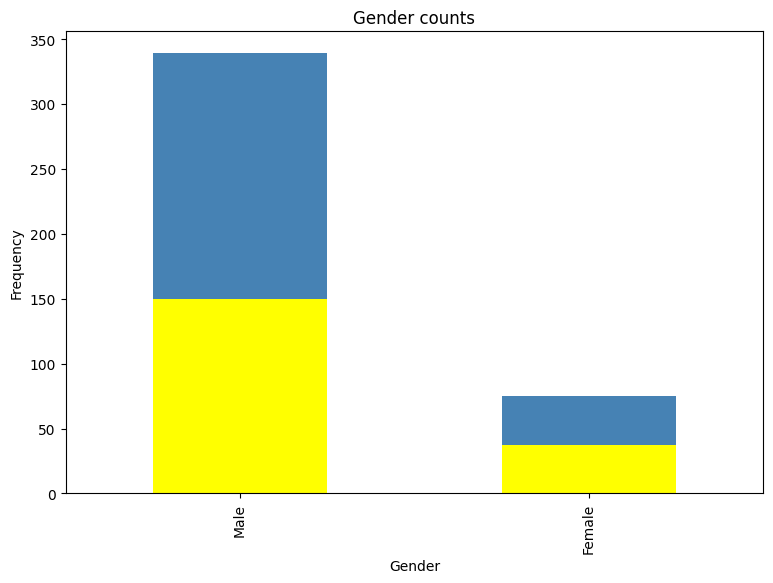

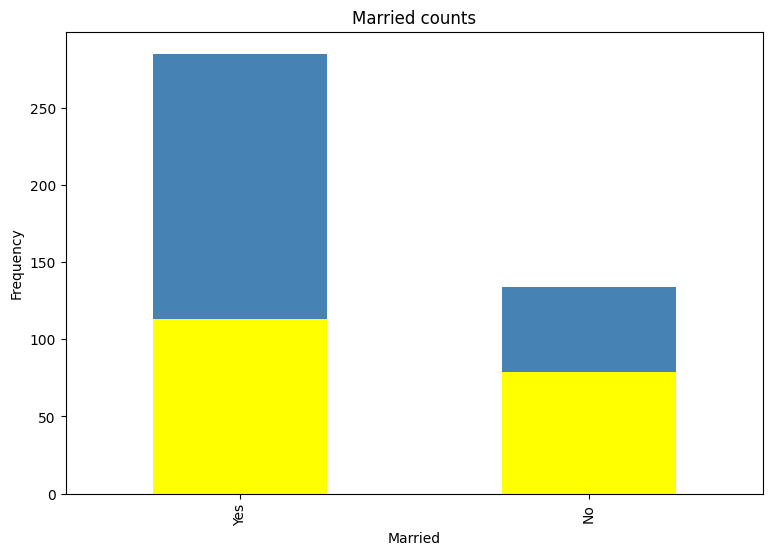

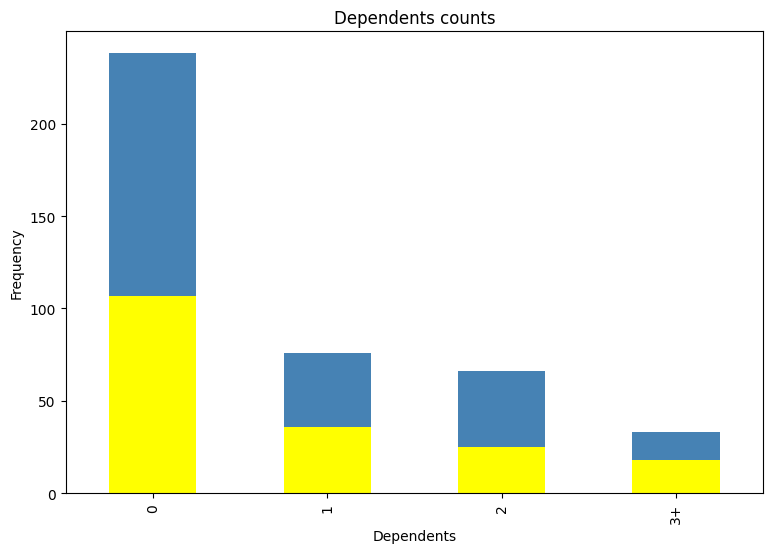

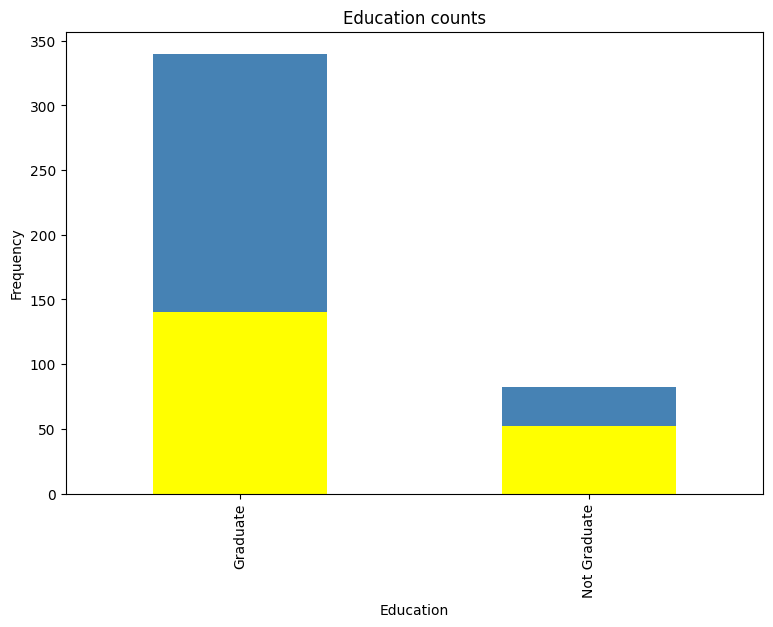

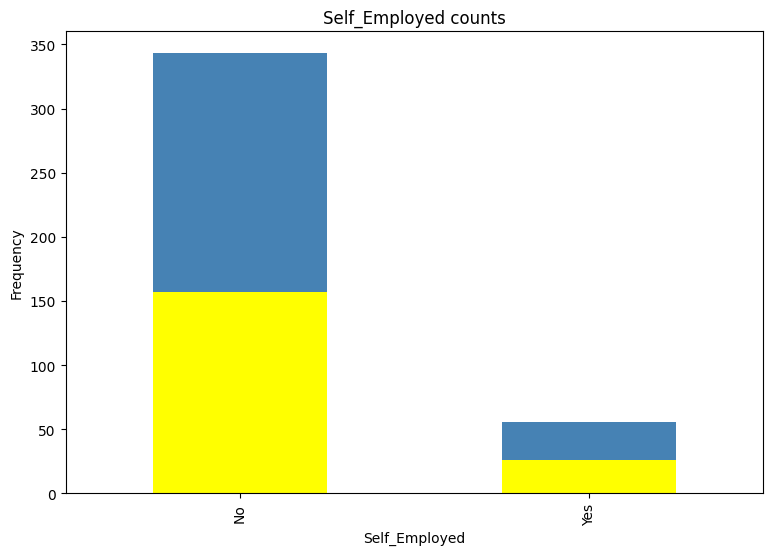

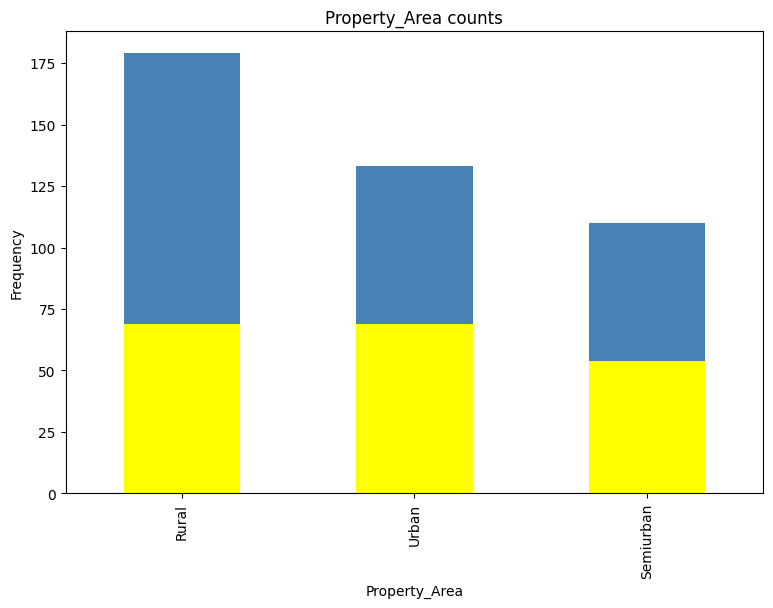

In [6]:
def plot_barchart(df, col):
    approved_counts = df[df['Loan_Status'] == 'Y'][col].value_counts()
    denied_counts = df[df['Loan_Status'] == 'N'][col].value_counts()

    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()

    approved_counts.plot.bar(ax=ax, color='steelblue')
    denied_counts.plot.bar(ax=ax, color='yellow')

    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_features:
    plot_barchart(df, col)


---
**Question:**
- **Can you share any interesting insights or observations you made during this visualization process? Consider aspects such as feature distributions, class separation, potential outliers, or any other patterns you noticed. How might these insights inform your approach to modeling or preprocessing in the next steps?"**

Skewed numerical distributions
ApplicantIncome, CoapplicantIncome, and LoanAmount are heavily right-skewed with many extreme outliers. Most applicants have relatively low to moderate income and loan amounts, but a small number have very large values. This suggests that scaling or log transformation may be useful during preprocessing to reduce the impact of outliers on the model.

Credit history is highly predictive. The boxplot and histogram show that applicants with a credit history of 1 are much more likely to be approved. This feature appears to have strong class separation and will likely be one of the most important predictors in the model.

Loan amount term has low variance. Most values are concentrated around 360 months, meaning this feature may contribute less to model performance because it does not vary much across samples.

Class imbalance is an insight I made too, there are more approved loans (Y) than denied loans (N). This imbalance may bias the model toward predicting approvals. Techniques such as stratified splitting, class weights, or resampling may be needed.

Categorical feature relationships:
Married applicants have higher approval counts than unmarried ones. Graduates appear to have more approvals than non-graduates. Urban and semi-urban property areas show more approvals compared to rural areas. These features may provide useful signal after encoding.

Potential missing values
The summary statistics show different counts across features, indicating missing data. This will require imputation before modeling.

## Step3:
**Handling missing values**

In [7]:
def count_the_missing_values_of_each_column(df):
    missing_values_series = df.isnull().sum()
    return missing_values_series

missing_values_series = count_the_missing_values_of_each_column(df)
print(missing_values_series)


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


**Part1**:

Since KNN could only handle numercal values, we should first transform the categorical variables into numerical ones:

In [8]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

def knn_impute_missing_values(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    scaler = StandardScaler()
    knn_imputer = KNNImputer(n_neighbors=5)

    # scale
    scaled_data = scaler.fit_transform(df[numeric_columns])

    # impute
    imputed_data = knn_imputer.fit_transform(scaled_data)

    # inverse scale back to original values
    imputed_data = scaler.inverse_transform(imputed_data)

    df[numeric_columns] = pd.DataFrame(
        imputed_data,
        columns=numeric_columns,
        index=df.index
    )

    return df

df = knn_impute_missing_values(df)
df.head()


/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,147.8,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


**part2**: 

Now that we've transformed the data lets use KNN to impute the missing values:

In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

def count_missing(df):
    return df.isnull().sum()

cat_cols = ["Gender", "Married", "Dependents", "Self_Employed"]
num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]

cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])

knn = KNNImputer(n_neighbors=5)
imputed_scaled = knn.fit_transform(scaled)

df[num_cols] = scaler.inverse_transform(imputed_scaled)

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
df[cat_cols] = encoder.fit_transform(df[cat_cols])

print(count_missing(df))
df.head()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,Graduate,0.0,5849.0,0.0,147.8,360.0,1.0,Urban,Y
1,1.0,1.0,1.0,Graduate,0.0,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0.0,Graduate,1.0,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0.0,Not Graduate,0.0,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0.0,Graduate,0.0,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
missing_values_series = count_the_missing_values_of_each_column(df)
print(missing_values_series)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,Graduate,0.0,5849.0,0.0,147.8,360.0,1.0,Urban,Y
1,1.0,1.0,1.0,Graduate,0.0,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0.0,Graduate,1.0,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0.0,Not Graduate,0.0,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0.0,Graduate,0.0,6000.0,0.0,141.0,360.0,1.0,Urban,Y


## Step4:

**Preparing data for prediction**

The following function will separate features from labels and then split the training set from testing set with test_size being 30% of the data and set the random_state to be zero

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/loan.csv")

def separate_features_from_label_and_split_the_data(df, features, label, test_size=0.3, random_state=0):
    label_encoder = LabelEncoder()
    df[label] = label_encoder.fit_transform(df[label]) 

    X = df[features]
    y = df[label]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test

features = ['Gender','Married','Dependents','Education','Self_Employed',
            'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
            'Credit_History','Property_Area']
label = 'Loan_Status'

X_train, X_test, y_train, y_test = separate_features_from_label_and_split_the_data(
    df, features, label, test_size=0.30, random_state=0
)

print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))


Training cases: 429
Test cases: 185


## Step5:

**Lets begin by training a KNN model**

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

ordinal_categorical_feature = ["Education"]

onehot_categorical_features = ["Gender", "Married", "Dependents", "Self_Employed", "Property_Area"]

numerical_features = [
    "ApplicantIncome", "CoapplicantIncome", "LoanAmount",
    "Loan_Amount_Term", "Credit_History"
]

def generate_knn_pipeline(ordinal_categorical_feature, onehot_categorical_features, numerical_features, n_neighbors=3):
    ordinal_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
    ])

    onehot_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("ord", ordinal_transformer, ordinal_categorical_feature),
            ("oh", onehot_transformer, onehot_categorical_features),
            ("num", numeric_transformer, numerical_features),
        ],
        remainder="drop"
    )

    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    return pipeline

pipeline = generate_knn_pipeline(
    ordinal_categorical_feature,
    onehot_categorical_features,
    numerical_features,
    n_neighbors=3
)

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm, "\n")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))


Confusion Matrix:
 [[ 25  26]
 [ 18 116]] 

Accuracy: 0.7621621621621621
Overall Precision: 0.8169014084507042
Overall Recall: 0.8656716417910447


---
**Question:**
- **We have employed both the Ordinal encoder and the OneHot encoder in this exercise for encoding different categorical features. Can you provide a rationale for the choice of encoder for each feature? In other words, why did we choose to use the Ordinal encoder for certain features and the OneHot encoder for others? What considerations or characteristics of the features have influenced our decision in selecting the appropriate encoder for each case?**

I used OrdinalEncoder for Education because this feature has a natural order: Not Graduate < Graduate, this means one category represents a higher level than the other.
Encoding it as 0 and 1 preserves that ranking, which helps KNN measure meaningful distances (Graduate is “closer” to Not Graduate than to some unrelated category). If I used OneHot here, I would lose the order information and treat both categories as completely unrelated, which is less informative.

I used OneHotEncoder for Property_Area because it is a nominal feature: Urban, Semiurban, Rural. These categories have no natural order. If I used OrdinalEncoder, I would assign numbers like: Urban = 0, Rural = 1, Semiurban = 2. KNN would then think “Semiurban” is numerically farther from “Urban” than “Rural”, which is not meaningful and would distort distance calculations. OneHotEncoder avoids this by creating separate binary columns, so all categories are treated as equally different.

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get predictions from test data
predictions = pipeline.predict(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', cm, '\n')
print("Accuracy:", accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))


Confusion Matrix:
 [[ 25  26]
 [ 18 116]] 

Accuracy: 0.7621621621621621
Overall Precision: 0.8169014084507042
Overall Recall: 0.8656716417910447


## Step6: 
**Lets make the pipeline comprehensive and include the missing value imputation in the pipeline**

In [9]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

df = pd.read_csv("data/loan.csv")

features = [
    "Gender", "Married", "Dependents", "Education", "Self_Employed",
    "ApplicantIncome", "CoapplicantIncome", "LoanAmount",
    "Loan_Amount_Term", "Credit_History", "Property_Area"
]
label = "Loan_Status"

label_encoder = LabelEncoder()
df[label] = label_encoder.fit_transform(df[label])

X = df[features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0
)

ordinal_categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed"]
onehot_categorical_features = ["Property_Area"]
numerical_features = [c for c in features if c not in ordinal_categorical_features + onehot_categorical_features]

ordinal_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
])

onehot_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

num_pipe = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler()),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat1", ordinal_pipe, ordinal_categorical_features),
        ("cat2", onehot_pipe, onehot_categorical_features),
        ("num", num_pipe, numerical_features),
    ],
    remainder="drop"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=3)),
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm, "\n")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))


Confusion Matrix:
 [[ 25  26]
 [ 17 117]] 

Accuracy: 0.7675675675675676
Overall Precision: 0.8181818181818182
Overall Recall: 0.8731343283582089


/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm, "\n")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))


Confusion Matrix:
 [[ 25  26]
 [ 17 117]] 

Accuracy: 0.7675675675675676
Overall Precision: 0.8181818181818182
Overall Recall: 0.8731343283582089


/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


## Step7: 
**Lets try other classifiers in the pipeline**

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
pipeline.set_params(classifier=gnb)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed']),
                                                 ('cat2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Property_Area']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('classifier', GaussianNB())])

In [12]:
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm, "\n")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))


Confusion Matrix:
 [[ 22  29]
 [  4 130]] 

Accuracy: 0.8216216216216217
Overall Precision: 0.8176100628930818
Overall Recall: 0.9701492537313433


/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Replacing the Naive Bayse model with SVM

In [13]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', gamma=10)

pipeline.set_params(classifier=svc)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed']),
                                                 ('cat2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Property_Area']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('classifier', SVC(gamma=10, kernel='linear'))])

In [14]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get predictions from test data
predictions = pipeline.predict(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm, "\n")

print("Accuracy:", accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))


Confusion Matrix:
 [[ 21  30]
 [  2 132]] 

Accuracy: 0.827027027027027
Overall Precision: 0.8148148148148148
Overall Recall: 0.9850746268656716


/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


---
**Question:**
- **Among the various classification models implemented in this exercise, which one demonstrates superior performance in terms of the evaluation metrics such as accuracy, precision, and recall? Provide a detailed interpretation of the metrics and explain why you consider one model to be more effective than others in addressing the classification task. Consider aspects such as the balance between precision and recall, and any specific characteristics of the dataset that might influence your choice of the most effective model.**

Among the three models of KNN, Naive Bayes, and SVM, the SVM classifier demonstrates the best overall performance based on accuracy, precision, and recall. SVM achieved an accuracy of approximately 0.827, which is higher than both KNN (≈0.77–0.78) and Naive Bayes (≈0.822). This indicates that SVM produces the fewest total classification errors.

In terms of recall, SVM performs the strongest with a value of about 0.985, meaning it correctly identifies nearly all approved loan applicants and produces very few false negatives. This is particularly important in a loan approval setting, where rejecting a qualified applicant is typically more costly than approving an unqualified one.

Although SVM’s precision (≈0.814) is slightly lower than its recall, it still means that over 81% of predicted approvals are correct, which represents a reasonable trade-off given the very high recall. KNN shows lower accuracy and recall because it is sensitive to class imbalance and local data structure. Naive Bayes achieves high recall (≈0.97) but assumes feature independence, which is unrealistic for this dataset since variables such as income, loan amount, and credit history are correlated.

Because SVM benefits from proper scaling and can model more complex decision boundaries in higher-dimensional data, it is the most effective classifier for this loan prediction task.

## Step 8:
**Considering the classification models covered in this lesson, implement a model to identify the single feature that provides the best separation for the classification task. Report the evaluation metrics of the model, including accuracy. Additionally, specify which feature is determined to be the most effective for classification.**

In [15]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv("data/loan.csv")

features = [
    "Gender", "Married", "Dependents", "Education", "Self_Employed",
    "ApplicantIncome", "CoapplicantIncome", "LoanAmount",
    "Loan_Amount_Term", "Credit_History", "Property_Area"
]
label = "Loan_Status"

le = LabelEncoder()
df[label] = le.fit_transform(df[label])

X = df[features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0
)

results = []

for feature in features:

    X_train_single = X_train[[feature]]
    X_test_single = X_test[[feature]]

    # numeric vs categorical
    if pd.api.types.is_numeric_dtype(df[feature]):
        preprocessor = ColumnTransformer(
            transformers=[("num", StandardScaler(), [feature])],
            remainder="drop"
        )
    else:
        preprocessor = ColumnTransformer(
            transformers=[("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), [feature])],
            remainder="drop"
        )

    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("imputer", KNNImputer(n_neighbors=5)),
        ("classifier", SVC(kernel="linear"))
    ])

    pipeline.fit(X_train_single, y_train)
    preds = pipeline.predict(X_test_single)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)
    rec = recall_score(y_test, preds, zero_division=0)

    results.append((feature, acc, prec, rec))

results_df = pd.DataFrame(results, columns=["Feature", "Accuracy", "Precision", "Recall"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print(results_df)
print("\nBest feature:", results_df.iloc[0]["Feature"])
print("Best feature metrics:",
      "Accuracy =", results_df.iloc[0]["Accuracy"],
      "Precision =", results_df.iloc[0]["Precision"],
      "Recall =", results_df.iloc[0]["Recall"])


              Feature  Accuracy  Precision    Recall
9      Credit_History  0.827027   0.814815  0.985075
0              Gender  0.724324   0.724324  1.000000
1             Married  0.724324   0.724324  1.000000
2          Dependents  0.724324   0.724324  1.000000
3           Education  0.724324   0.724324  1.000000
4       Self_Employed  0.724324   0.724324  1.000000
5     ApplicantIncome  0.724324   0.724324  1.000000
6   CoapplicantIncome  0.724324   0.724324  1.000000
7          LoanAmount  0.724324   0.724324  1.000000
8    Loan_Amount_Term  0.724324   0.724324  1.000000
10      Property_Area  0.724324   0.724324  1.000000

Best feature: Credit_History
Best feature metrics: Accuracy = 0.827027027027027 Precision = 0.8148148148148148 Recall = 0.9850746268656716


The single feature SVM model identified Credit_History as the most effective predictor for the classification task. Using only this feature, the model achieved an accuracy of 0.827, a precision of 0.815, and a recall of 0.985. These results indicate strong overall performance, with particularly high recall, meaning the model correctly identifies the vast majority of approved loans while maintaining good precision. Compared to all other individual features, which produced lower accuracy (around 0.724) and weaker precision, Credit_History provides the best separation between approved and rejected applications and is therefore the most informative single feature for this classification problem.

## Step 9:

**Revisit Step 2 in your analysis. Identify and implement one preprocessing technique covered in this course that has not been applied yet. Apply this technique to the best-performing model from Step 7 and report its impact on the evaluation metrics.**

In [16]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv("data/loan.csv")

features = [
    "Gender","Married","Dependents","Education","Self_Employed",
    "ApplicantIncome","CoapplicantIncome","LoanAmount",
    "Loan_Amount_Term","Credit_History","Property_Area"
]
label = "Loan_Status"

df[label] = df[label].map({"N":0, "Y":1})

X = df[features]
y = df[label]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

def clip_outliers_iqr(df, cols):
    df = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower, upper)
    return df

numerical_features = [
    "ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"
]

X_train = clip_outliers_iqr(X_train, numerical_features)
X_test = clip_outliers_iqr(X_test, numerical_features)

ordinal_categorical_features = ["Gender","Married","Dependents","Education","Self_Employed"]
onehot_categorical_features = ["Property_Area"]

preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
         ordinal_categorical_features),
        ("oh", OneHotEncoder(handle_unknown="ignore", sparse_output=False),
         onehot_categorical_features),
        ("num", StandardScaler(), numerical_features),
    ],
    remainder="drop"
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("imputer", KNNImputer(n_neighbors=5)),
    ("classifier", SVC(kernel="linear"))
])

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)


Accuracy: 0.7243243243243244
Precision: 0.7243243243243244
Recall: 1.0


/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


After applying IQ based outlier clipping to the numerical features, the model’s recall increased to 1.0, meaning it correctly identified all positive loan approvals in the test set. This indicates the model became more sensitive to the positive class and avoided false negatives, which is beneficial in a loan approval context where missing eligible applicants is costly. However, this came at the expense of overall performance because accuracy dropped to 0.7243 and precision also decreased to 0.7243, showing that the model produced more false positives after clipping. In other words, while the model now captures every true approval, it also incorrectly predicts approval for more ineligible applicants.

Compared to the earlier best performing model (which achieved higher accuracy and precision with slightly lower recall), the outlier handling shifted the model toward recall optimization rather than balanced performance. This suggests that the removed or capped extreme values previously helped the model distinguish between approved and rejected loans more precisely. Therefore, although outlier clipping improved sensitivity, it reduced the model’s ability to discriminate between classes effectively.

Overall, the preprocessing did not improve the balanced performance of the best model from Step 7. It may be useful in scenarios where maximizing recall is the priority, but for this dataset, the original model without outlier clipping remains the better choice due to its higher accuracy and precision and more balanced classification behavior.

In [17]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

df = pd.read_csv("data/loan.csv")

features = [
    "Gender", "Married", "Dependents", "Education", "Self_Employed",
    "ApplicantIncome", "CoapplicantIncome", "LoanAmount",
    "Loan_Amount_Term", "Credit_History", "Property_Area"
]
label = "Loan_Status"

df[label] = df[label].map({"N": 0, "Y": 1})

X = df[features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0
)

ordinal_categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed"]
onehot_categorical_features = ["Property_Area"]
numerical_features = [c for c in features if c not in ordinal_categorical_features + onehot_categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), ordinal_categorical_features),
        ("oh", OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_categorical_features),
        ("num", StandardScaler(), numerical_features),
    ],
    remainder="drop"
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("imputer", KNNImputer(n_neighbors=5)),
    ("pca", PCA(n_components=0.95)),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced")),
])

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:\n", cm, "\n")
print("Accuracy:", accuracy_score(y_test, preds))
print("Overall Precision:", precision_score(y_test, preds))
print("Overall Recall:", recall_score(y_test, preds))


/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Confusion Matrix:
 [[ 31  20]
 [ 22 112]] 

Accuracy: 0.772972972972973
Overall Precision: 0.8484848484848485
Overall Recall: 0.835820895522388


/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/renatoduka/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/renatoduka/Library/Python/3.9/